#Example Advertising click

引用程式庫

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import openpyxl
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc

輸入資料與列印檔頭

In [2]:
data =  pd.read_csv('advertising.csv')
data1=data
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


資料敘述性描述

In [3]:
data.describe()
total_sample=data.shape[0]

去除不要的欄位
df DataFrame for output

In [4]:
data.drop(['Ad Topic Line','City','Country','Timestamp'],axis = 1,inplace = True)
output_column=data.columns.values.tolist()

In [5]:
data1.drop(['Male',],axis=1,inplace=True)
data1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,0
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,0
4,68.37,35,73889.99,225.58,0


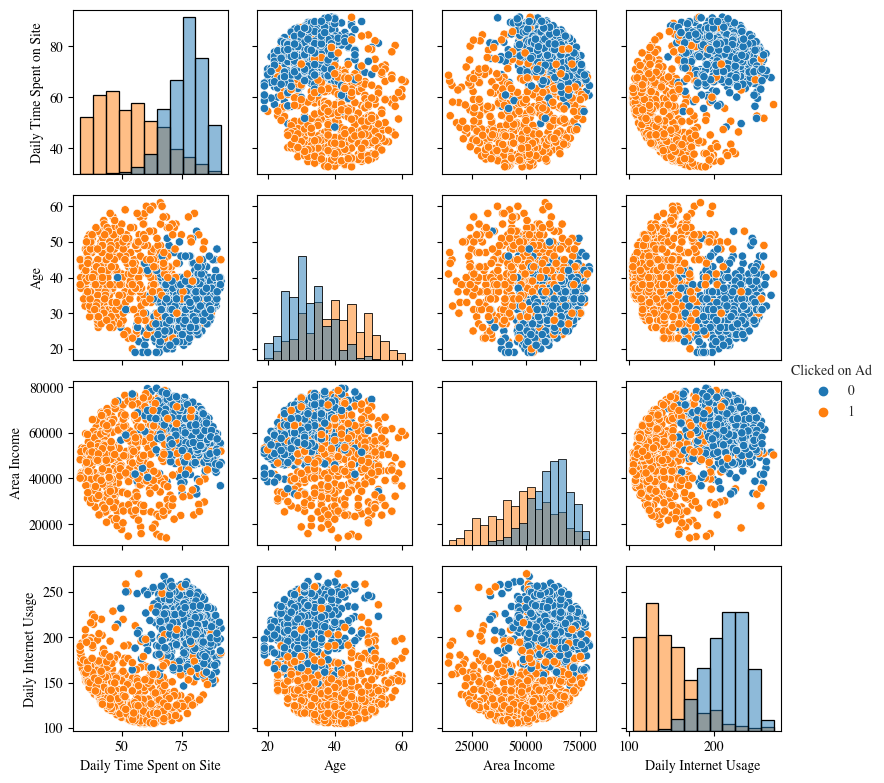

In [6]:

g=sns.PairGrid(data1,hue="Clicked on Ad",height=2,despine=False)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

sns.set_style('ticks')
sns.set_style('ticks', 
              { 'xtick.direction': 'in',
                'xtick.top': True,
                'ytick.right': True,
                'font.sans-serif': 'Times',
                'ytick.direction': 'in',
                
                })
g.add_legend()
g.savefig("figure4.png")

資料分割

In [7]:
X = data.iloc[:,0:4].values
print(type(X))
Y = data['Clicked on Ad'].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 1/3,random_state = 0)
X_traino=X_train
X_testo=X_test
Y_traino=Y_train
Y_testo=Y_test

<class 'numpy.ndarray'>


資料正規化

In [8]:
stdscaler = StandardScaler()
X_train = stdscaler.fit_transform(X_train)
X_test = stdscaler.transform(X_test)

貝氏分類器

In [9]:

clf = GaussianNB()
clf.fit(X_train,Y_train)

GaussianNB()

In [10]:
from sklearn import svm
sf = svm.SVC(kernel='rbf')
sf.fit(X_train,Y_train)
y_pred3=sf.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(precision_score(Y_test,y_pred3))
print()
print(recall_score(Y_test,y_pred3))
print()
print(f1_score(Y_test,y_pred3))
print()

0.948051948051948

0.954248366013072

0.9511400651465798



In [12]:
fpr3, tpr3, thresholds3 = roc_curve(Y_test, y_pred3)
auc_score=roc_auc_score(Y_test, y_pred3)
print(fpr3)
print(tpr3)
print(thresholds3)
print(auc_score)

[0.        0.0441989 1.       ]
[0.         0.95424837 1.        ]
[2 1 0]
0.9550247354927238


In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', n_estimators=1000,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=42,n_jobs=-1)
rf.fit(X_train,Y_train)
rf_test_pred = rf.predict(X_test)

cm2=confusion_matrix(Y_test,rf_test_pred)
print(cm2)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[[171  10]
 [  6 147]]


In [14]:
fpr1, tpr1, thresholds1 = roc_curve(Y_test, rf_test_pred)
auc_score=roc_auc_score(Y_test, rf_test_pred)
print(fpr1)
print(tpr1)
print(thresholds1)
print(auc_score)

[0.         0.05524862 1.        ]
[0.         0.96078431 1.        ]
[2 1 0]
0.95276784747048


In [15]:
y_pred = clf.predict(X_test)
y_predproba=clf.predict_proba(X_test)
y_predprobatrain=clf.predict_proba(X_train)

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[173   8]
 [  4 149]]


[2.00000000e+00 1.00000000e+00 9.88218434e-01 9.86753050e-01
 9.72750603e-01 9.56087119e-01 8.81370139e-01 8.38706355e-01
 7.13045191e-01 6.54427985e-01 6.41981108e-01 5.45202304e-01
 5.03439496e-01 2.36097420e-01 2.20982784e-01 1.32578709e-01
 1.13959461e-01 8.56128915e-02 8.53381519e-02 9.18925289e-04
 8.80180928e-04 2.02075682e-04] [0.         0.00653595 0.91503268 0.91503268 0.92810458 0.92810458
 0.95424837 0.95424837 0.96078431 0.96078431 0.96732026 0.96732026
 0.97385621 0.97385621 0.98039216 0.98039216 0.9869281  0.9869281
 0.99346405 0.99346405 1.         1.        ] [0.         0.         0.         0.00552486 0.00552486 0.01104972
 0.01104972 0.01657459 0.01657459 0.02209945 0.02209945 0.0441989
 0.0441989  0.08287293 0.08287293 0.09944751 0.09944751 0.1160221
 0.1160221  0.6519337  0.6519337  1.        ]
0.9640718562874252
0.9490445859872612

0.9738562091503268

0.9612903225806452

0.9928862889538872


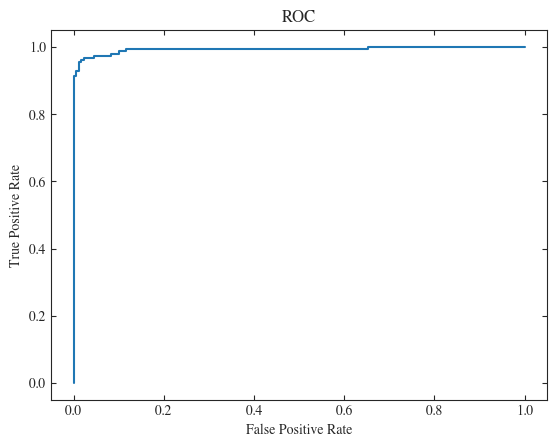

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_predproba[:,1])
print(thresholds,true_positive_rate,false_positive_rate)
df = pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })
df.to_csv("roc2.csv")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
print(accuracy_score(Y_test,y_pred))
print(precision_score(Y_test,y_pred))
print()
print(recall_score(Y_test,y_pred))
print()
print(f1_score(Y_test,y_pred))
print()
from sklearn.metrics import roc_curve, auc
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

In [18]:
print('Accuracy score:',accuracy_score(Y_test,y_pred))

Accuracy score: 0.9640718562874252


In [19]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
auc_score=roc_auc_score(Y_test, y_pred)
print(fpr)
print(tpr)
print(thresholds)
print(auc_score)

[0.        0.0441989 1.       ]
[0.         0.97385621 1.        ]
[2 1 0]
0.9648286570613512


<Axes: title={'center': 'Confusion matrix'}>

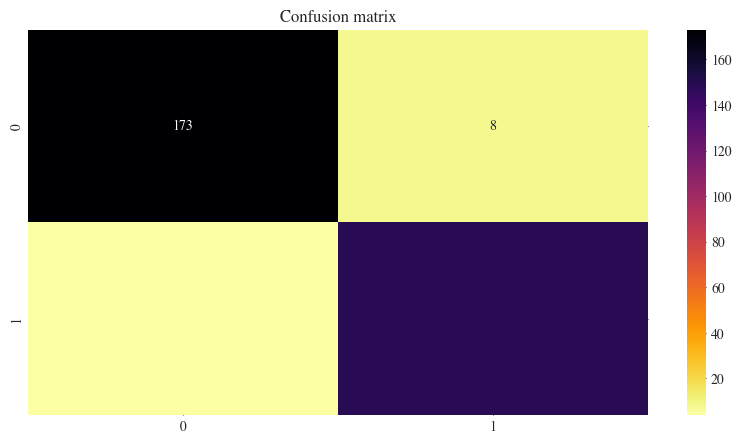

In [20]:
#plotting the confusion matrix
plt.figure(figsize=(10,5))
plt.title('Confusion matrix')
sns.heatmap(cm,annot=True,fmt='d',cmap='inferno_r')

In [21]:
wb=openpyxl.Workbook()
s1=wb.active

s1['A1']=output_column[0]
s1['B1']=output_column[1]
s1['C1']=output_column[2]
s1['D1']=output_column[3]
s1['E1']='posterior probability'
s1['F1']='class'
wb.save('output.xlsx')

wb2=openpyxl.Workbook()
s2=wb2.active

s2['A1']=output_column[0]
s2['B1']=output_column[1]
s2['C1']=output_column[2]
s2['D1']=output_column[3]
s2['E1']='posterior probability'

wb2.save('output2.xlsx')

wb3=openpyxl.Workbook()
s3=wb3.active

s3['A1']=output_column[0]
s3['B1']=output_column[1]
s3['C1']=output_column[2]
s3['D1']=output_column[3]
s3['E1']='posterior probability'

wb3.save('output31.xlsx')

計算confidence interval
C=confidence level
ci_upper confidence右邊
ci_lower confidence左邊

In [22]:
traintotal=X_traino.shape[0]
yp=[]
xp=[]
nclass=0
workbook=openpyxl.load_workbook('output.xlsx')
sheet=workbook.active
for i in range(traintotal):
    if(Y_traino[i]==nclass):
        yp.append(y_predprobatrain[i,nclass])
        xp.append(X_traino[i,:])

testtotal=X_testo.shape[0]

for i in range(testtotal):
    if(Y_testo[i]==nclass):
        yp.append(y_predproba[i,nclass])
        xp.append(X_testo[i,:])
        
C=50
ci_upper=np.percentile(yp,100-(100-C)*0.5)
ci_lower=np.percentile(yp,(100-C)*0.5)

j=2
for k in range(len(yp)):
    if(ci_lower<=yp[k]<=ci_upper):
        sheet.cell(j,1).value=xp[k][0]
        sheet.cell(j,2).value=xp[k][1]
        sheet.cell(j,3).value=xp[k][2]
        sheet.cell(j,4).value=xp[k][3]
        sheet.cell(j,5).value=yp[k]
        sheet.cell(j,6).value=nclass
        j+=1
        
workbook.save('output.xlsx')

In [23]:
traintotal=X_traino.shape[0]
yp=[]
xp=[]
nclass=0
c1class=0
workbook=openpyxl.load_workbook('output31.xlsx')
sheet=workbook.active

for i in range(traintotal):
    if(Y_traino[i]==nclass):
        c1class += 1
        yp.append(y_predprobatrain[i,nclass])
        xp.append(X_traino[i,:])

testtotal=X_testo.shape[0]

for i in range(testtotal):
    if(Y_testo[i]==nclass):
        c1class += 1
        yp.append(y_predproba[i,nclass])
        xp.append(X_testo[i,:])
        
C=50
ci_upper=np.percentile(yp,100-(100-C)*0.5)
ci_lower=np.percentile(yp,(100-C)*0.5)
print(ci_upper)
print(ci_lower)

for k in range(len(yp)):
    if(ci_lower<=yp[k]<=ci_upper):
        sheet.cell(j,1).value=xp[k][0]
        sheet.cell(j,2).value=xp[k][1]
        sheet.cell(j,3).value=xp[k][2]
        sheet.cell(j,4).value=xp[k][3]
        sheet.cell(j,5).value=yp[k]
        sheet.cell(j,6).value=nclass
        j+=1
        
workbook.save('output31.xlsx')

0.999316118915477
0.9886738447296681


In [24]:
traintotal=X_traino.shape[0]
yp=[]
xp=[]
nclass=1
workbook=openpyxl.load_workbook('output.xlsx')
sheet=workbook.active
for i in range(traintotal):
    if(Y_traino[i]==nclass):
        yp.append(y_predprobatrain[i,nclass])
        xp.append(X_traino[i,:])

testtotal=X_testo.shape[0]

for i in range(testtotal):
    if(Y_testo[i]==nclass):
        yp.append(y_predproba[i,nclass])
        xp.append(X_testo[i,:])
        
C=50
ci_upper=np.percentile(yp,100-(100-C)*0.5)
ci_lower=np.percentile(yp,(100-C)*0.5)

j=2
for k in range(len(yp)):
    if(ci_lower<=yp[k]<=ci_upper):
        sheet.cell(j,1).value=xp[k][0]
        sheet.cell(j,2).value=xp[k][1]
        sheet.cell(j,3).value=xp[k][2]
        sheet.cell(j,4).value=xp[k][3]
        sheet.cell(j,5).value=yp[k]
        sheet.cell(j,6).value=nclass
        j+=1
        
workbook.save('output.xlsx')

In [25]:
traintotal=X_traino.shape[0]
yp=[]
xp=[]
nclass=1
ppc=c1class/total_sample
workbook=openpyxl.load_workbook('output2.xlsx')
sheet=workbook.active

for i in range(traintotal):
    if(Y_traino[i]==nclass):
        
        yp.append(y_predprobatrain[i,nclass]*0.999999866285462/ppc)
        xp.append(X_traino[i,:])

testtotal=X_testo.shape[0]

for i in range(testtotal):
    if(Y_testo[i]==nclass):
        c1class += 1
        yp.append(y_predproba[i,nclass]*0.999999866285462/ppc)
        xp.append(X_testo[i,:])
        

ci_lower=1.99999

j=2
for k in range(len(yp)):
    if(ci_lower<=yp[k]):
        sheet.cell(j,1).value=xp[k][0]
        sheet.cell(j,2).value=xp[k][1]
        sheet.cell(j,3).value=xp[k][2]
        sheet.cell(j,4).value=xp[k][3]
        sheet.cell(j,5).value=yp[k]
        sheet.cell(j,6).value=yp[k]*ppc/0.999999866285462
        j+=1
        
workbook.save('output2.xlsx')

In [26]:
from sklearn.metrics import classification_report
print(f'Classification Report: \n{classification_report(Y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       181
           1       0.95      0.97      0.96       153

    accuracy                           0.96       334
   macro avg       0.96      0.96      0.96       334
weighted avg       0.96      0.96      0.96       334



In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm5 = confusion_matrix(Y_test, y_pred3)
print(cm5)

[[173   8]
 [  7 146]]
